In [ ]:
import pmdarima
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
csv_2019_path = "data2019.csv"
csv_2020_path = "data2020.csv"

In [106]:
from pmdarima import auto_arima, model_selection 
from sklearn.metrics import mean_squared_error
import pmdarima as pm

In [ ]:
# Reading the file
data_2019_df = pd.read_csv(csv_2019_path, encoding="utf-8")
data_2019_df.head()

In [5]:
data_2020_df = pd.read_csv(csv_2020_path, encoding="utf-8")
data_2020_df.head()

,PASSENGERS,FREIGHT,DISTANCE,UNIQUE_CARRIER_NAME,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP
0,0,0,104,Republic Airline,Republic Airline,RSW,"Fort Myers, FL",MIA,"Miami, FL",2020,1,1,1
1,0,0,77,Republic Airline,Republic Airline,RSW,"Fort Myers, FL",SRQ,"Sarasota/Bradenton, FL",2020,1,1,1
2,0,0,30,Republic Airline,Republic Airline,SAV,"Savannah, GA",HHH,"Hilton Head, SC",2020,1,1,1
3,0,0,228,Republic Airline,Republic Airline,STL,"St. Louis, MO",CID,"Cedar Rapids/Iowa City, IA",2020,1,1,1
4,0,0,466,Republic Airline,Republic Airline,LNK,"Lincoln, NE",ORD,"Chicago, IL",2020,1,1,1


In [15]:
# Combing data together

combine_Data = pd.concat([data_2019_df,data_2020_df])
print(combine_Data.shape)

(444162, 13)


In [16]:
#Filtering and Cleaning

combine_Data=combine_Data[(combine_Data["ORIGIN"]=="ATL")&
                          ((combine_Data["DEST"]=="IAH")|(combine_Data["DEST"]=="LAX")|
                           (combine_Data["DEST"]=="LGA")|(combine_Data["DEST"]=="HOU"))]

In [17]:
print(combine_Data.shape)

(421, 13)


In [62]:
combine_Data["YEAR_MONTH"] =(combine_Data["YEAR"].astype(str))+ "-" + (combine_Data["MONTH"].astype(str))+ "-01"

In [132]:
combine_Data["YEAR_MONTH"]= pd.to_datetime(combine_Data["YEAR_MONTH"],infer_datetime_format=True)

In [88]:
combine_Data

,PASSENGERS,FREIGHT,DISTANCE,UNIQUE_CARRIER_NAME,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,YEAR_MONTH
4173,0,0,1947,Atlas Air Inc.,Atlas Air Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,11,4,2019-11-01
10965,0,0,762,Miami Air International,Miami Air International,ATL,"Atlanta, GA",LGA,"New York, NY",2019,4,12,2,2019-12-01
13433,0,49782,689,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",IAH,"Houston, TX",2019,2,4,2,2019-04-01
21338,0,1287407,1947,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,11,4,2019-11-01
22145,0,463720,1947,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,12,4,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191718,29927,274986,1947,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2020,4,10,4,2020-10-01
192320,54819,882911,1947,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2020,1,2,4,2020-02-01
192325,56010,38826,762,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LGA,"New York, NY",2020,1,2,2,2020-02-01
192337,59187,43598,762,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LGA,"New York, NY",2020,1,1,2,2020-01-01


In [89]:
combine_Data

,PASSENGERS,FREIGHT,DISTANCE,UNIQUE_CARRIER_NAME,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,YEAR_MONTH
4173,0,0,1947,Atlas Air Inc.,Atlas Air Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,11,4,2019-11-01
10965,0,0,762,Miami Air International,Miami Air International,ATL,"Atlanta, GA",LGA,"New York, NY",2019,4,12,2,2019-12-01
13433,0,49782,689,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",IAH,"Houston, TX",2019,2,4,2,2019-04-01
21338,0,1287407,1947,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,11,4,2019-11-01
22145,0,463720,1947,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,12,4,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191718,29927,274986,1947,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2020,4,10,4,2020-10-01
192320,54819,882911,1947,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2020,1,2,4,2020-02-01
192325,56010,38826,762,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LGA,"New York, NY",2020,1,2,2,2020-02-01
192337,59187,43598,762,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LGA,"New York, NY",2020,1,1,2,2020-01-01


In [90]:
!pip install plotly

In [133]:
# Change the default stacking
import plotly.express as px
fig = px.bar(combine_Data, x="YEAR_MONTH", y="PASSENGERS",
             color='CARRIER_NAME', barmode='group')
fig.show()

In [93]:
combine_Data.drop(["DISTANCE","UNIQUE_CARRIER_NAME","ORIGIN_CITY_NAME","DISTANCE_GROUP"],axis=1)

,PASSENGERS,FREIGHT,CARRIER_NAME,ORIGIN,DEST,DEST_CITY_NAME,YEAR,QUARTER,MONTH,YEAR_MONTH
4173,0,0,Atlas Air Inc.,ATL,LAX,"Los Angeles, CA",2019,4,11,2019-11-01
10965,0,0,Miami Air International,ATL,LGA,"New York, NY",2019,4,12,2019-12-01
13433,0,49782,Federal Express Corporation,ATL,IAH,"Houston, TX",2019,2,4,2019-04-01
21338,0,1287407,Federal Express Corporation,ATL,LAX,"Los Angeles, CA",2019,4,11,2019-11-01
22145,0,463720,Federal Express Corporation,ATL,LAX,"Los Angeles, CA",2019,4,12,2019-12-01
...,...,...,...,...,...,...,...,...,...,...
191718,29927,274986,Delta Air Lines Inc.,ATL,LAX,"Los Angeles, CA",2020,4,10,2020-10-01
192320,54819,882911,Delta Air Lines Inc.,ATL,LAX,"Los Angeles, CA",2020,1,2,2020-02-01
192325,56010,38826,Delta Air Lines Inc.,ATL,LGA,"New York, NY",2020,1,2,2020-02-01
192337,59187,43598,Delta Air Lines Inc.,ATL,LGA,"New York, NY",2020,1,1,2020-01-01


In [134]:
import plotly.express as px
fig = px.bar(combine_Data, x="YEAR_MONTH", y="FREIGHT",
             color='CARRIER_NAME', barmode='group')
fig.show()

In [95]:
combine_Data

,PASSENGERS,FREIGHT,DISTANCE,UNIQUE_CARRIER_NAME,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,YEAR_MONTH
4173,0,0,1947,Atlas Air Inc.,Atlas Air Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,11,4,2019-11-01
10965,0,0,762,Miami Air International,Miami Air International,ATL,"Atlanta, GA",LGA,"New York, NY",2019,4,12,2,2019-12-01
13433,0,49782,689,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",IAH,"Houston, TX",2019,2,4,2,2019-04-01
21338,0,1287407,1947,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,11,4,2019-11-01
22145,0,463720,1947,Federal Express Corporation,Federal Express Corporation,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2019,4,12,4,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191718,29927,274986,1947,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2020,4,10,4,2020-10-01
192320,54819,882911,1947,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",2020,1,2,4,2020-02-01
192325,56010,38826,762,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LGA,"New York, NY",2020,1,2,2,2020-02-01
192337,59187,43598,762,Delta Air Lines Inc.,Delta Air Lines Inc.,ATL,"Atlanta, GA",LGA,"New York, NY",2020,1,1,2,2020-01-01


In [135]:
#Time series Data
df=combine_Data[["YEAR_MONTH","PASSENGERS"]]
df

,YEAR_MONTH,PASSENGERS
4173,2019-11-01,0
10965,2019-12-01,0
13433,2019-04-01,0
21338,2019-11-01,0
22145,2019-12-01,0
...,...,...
191718,2020-10-01,29927
192320,2020-02-01,54819
192325,2020-02-01,56010
192337,2020-01-01,59187


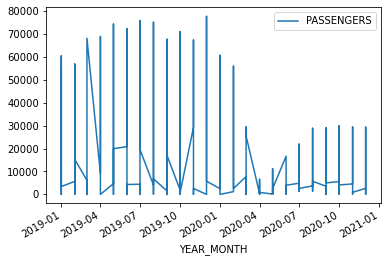

In [136]:
#Timeseries
df.plot(x="YEAR_MONTH",y="PASSENGERS")
plt.show()

In [100]:
df1=combine_Data[["YEAR_MONTH","FREIGHT"]]
df1

,YEAR_MONTH,FREIGHT
4173,2019-11-01,0
10965,2019-12-01,0
13433,2019-04-01,49782
21338,2019-11-01,1287407
22145,2019-12-01,463720
...,...,...
191718,2020-10-01,274986
192320,2020-02-01,882911
192325,2020-02-01,38826
192337,2020-01-01,43598


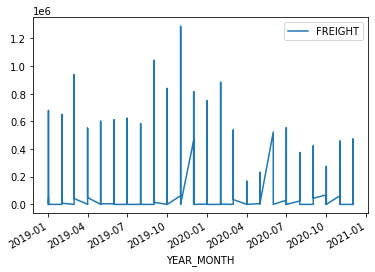

In [137]:
df1.plot(x="YEAR_MONTH",y="FREIGHT")
plt.show()

In [178]:

df.set_index("YEAR_MONTH")
train, test = model_selection.train_test_split(df["PASSENGERS"], train_size=90)
# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1, max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True, stepwise=True, suppress_warnings=True, D=10, max_D=10, error_action='ignore') 
# Create predictions for the future, evaluate on test 
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)
# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

Test RMSE: 18175.394


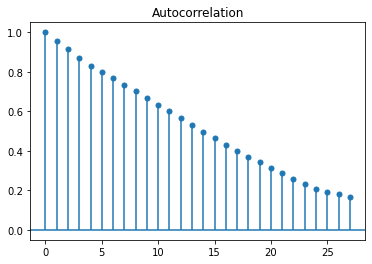

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 4173 to 192339
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   YEAR_MONTH  421 non-null    int64
 1   PASSENGERS  421 non-null    int64
dtypes: int64(2)
memory usage: 9.9 KB


In [145]:
pm.plot_acf(df["PASSENGERS"])
df.info()

C:\Users\Husse\.conda\envs\PythonData\lib\site-packages\pmdarima\utils\visualization.py:219: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead



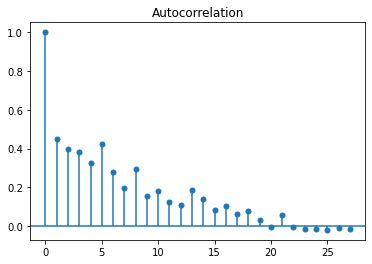

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 4173 to 192339
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YEAR_MONTH  421 non-null    datetime64[ns]
 1   FREIGHT     421 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.9 KB


In [177]:
pm.plot_acf(df1["FREIGHT"])
df1.info()

In [176]:

df1.set_index("YEAR_MONTH")
train, test_F = model_selection.train_test_split(df1["FREIGHT"], train_size=90)
# Fit a simple auto_arima model
modl_FREIGHT = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1, max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True, stepwise=True, suppress_warnings=True, D=10, max_D=10, error_action='ignore',m=1) 
# Create predictions for the future, evaluate on test 
preds, conf_int = modl_FREIGHT.predict(n_periods=test_F.shape[0], return_conf_int=True)
# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test_F, preds)))

Test RMSE: 166691.645


Text(0.5, 1.0, 'Test samples vs. forecasts (m=12)')

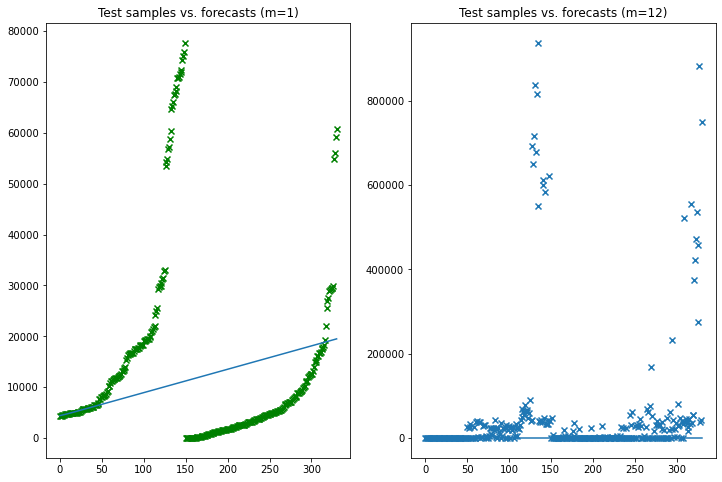

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
x = np.arange(test.shape[0])
# Plot m=1 
axes[0].scatter(x, test, marker='x',color="green") 
axes[0].plot(x, modl.predict(n_periods=test.shape[0])) 
axes[0].set_title('Test samples vs. forecasts (m=1)')

# Plot m=1 
x = np.arange(test_F.shape[0])
axes[1].scatter(x, test_F, marker='x') 
axes[1].plot(x, modl_FREIGHT.predict(n_periods=test_F.shape[0])) 
axes[1].set_title('Test samples vs. forecasts (m=12)')
